In [9]:
import sqlite3
from sqlite3 import Error
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn


def select_all_tasks(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM tasks")

    rows = cur.fetchall()

    for row in rows:
        print(row)


def select_task_by_priority(conn, priority):
    """
    Query tasks by priority
    :param conn: the Connection object
    :param priority:
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM tasks WHERE priority=?", (priority,))

    rows = cur.fetchall()

    for row in rows:
        print(row)

In [ ]:
database = 'FIADB_OH.db'
conn = create_connection(database)
c = conn.cursor()

In [ ]:
c.execute('SELECT name FROM sqlite_master where type= "table"')
print(c.fetchall())

In [ ]:
c.execute('SELECT * FROM TREE_GRM_COMPONENT')

# The data we selected from the table comes
# with a "description", which is the column labels
# we can access those with a quick list comprehension
tree_comp = pd.DataFrame(c.fetchall(), columns = [x[0] for x in c.description])

In [ ]:
tree_comp.columns

In [ ]:
c.execute('SELECT * FROM SURVEY')

# The data we selected from the table comes
# with a "description", which is the column labels
# we can access those with a quick list comprehension
survey = pd.DataFrame(c.fetchall(), columns = [x[0] for x in c.description])

In [ ]:
survey.columns

In [ ]:
len(tree_comp["CREATED_DATE"])

In [ ]:
type(tree_comp["CREATED_DATE"][len(tree_comp["CREATED_DATE"])-1])

In [ ]:
from datetime import datetime

date_str = tree_comp["CREATED_DATE"][len(tree_comp["CREATED_DATE"])-1]

date_object = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S').date()
print(type(date_object))
print(date_object)  # printed in default formatting

In [ ]:
date = []
for element in tree_comp["CREATED_DATE"]:
    date.append(datetime.strptime(element, '%Y-%m-%d %H:%M:%S').date())

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
fig, ax = plt.subplots(figsize=(20,4))
rule = rrulewrapper(MONTHLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
plt.plot_date(date,tree_comp["DIA_BEGIN"])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=90, labelsize=10)

In [ ]:
len(tree_comp["TRE_CN"])

In [ ]:
x = np.linspace(0,len(tree_comp["TRE_CN"]),len(tree_comp["TRE_CN"]))

In [ ]:
plt.scatter(x,tree_comp["TRE_CN"])

In [1]:
import bq_helper
from bq_helper import BigQueryHelper
usfs = BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="usfs_fia")

In [53]:
usfs.list_tables()

['condition',
 'estimated_forestland_acres',
 'estimated_timberland_acres',
 'plot',
 'plot_tree',
 'population',
 'population_estimation_unit',
 'population_evaluation',
 'population_evaluation_group',
 'population_evaluation_type',
 'population_stratum',
 'population_stratum_assign',
 'tree']

See what's in plot_tree

In [140]:
usfs.table_schema('tree')

,name,type,mode,description
0,tree_sequence_number,INTEGER,NULLABLE,Foreign key linking the tree regional biomass ...
1,plot_sequence_number,INTEGER,NULLABLE,Foreign key linking the subplot record to the ...
2,previous_tree_sequence_number,INTEGER,NULLABLE,Foreign key linking the tree to the previous i...
3,tree_inventory_year,INTEGER,NULLABLE,The year that best represents when the invento...
4,tree_state_code,INTEGER,NULLABLE,Bureau of the Census Federal Information Proce...
...,...,...,...,...
250,inc5yrht_pnwrs,STRING,NULLABLE,
251,inc5yr_pnwrs,STRING,NULLABLE,
252,ring_count_inner_2inches_pnwrs,STRING,NULLABLE,
253,ring_count_pnwrs,STRING,NULLABLE,


From the description, find the code of the tree (is it unique?)

In [109]:
usfs.table_schema('tree')[usfs.table_schema('tree')["description"] == "An identifier for a plot. Along with state code, inventory year, tree survey unit code, County code and/or some other combinations of variables, PLOT may be used to uniquely identify a plot."].index.tolist()

[7]

In [124]:
usfs.table_schema('tree').head(8)

,name,type,mode,description
0,tree_sequence_number,INTEGER,NULLABLE,Foreign key linking the tree regional biomass ...
1,plot_sequence_number,INTEGER,NULLABLE,Foreign key linking the subplot record to the ...
2,previous_tree_sequence_number,INTEGER,NULLABLE,Foreign key linking the tree to the previous i...
3,tree_inventory_year,INTEGER,NULLABLE,The year that best represents when the invento...
4,tree_state_code,INTEGER,NULLABLE,Bureau of the Census Federal Information Proce...
5,tree_survey_unit_code,INTEGER,NULLABLE,Forest Inventory and Analysis survey unit iden...
6,tree_county_code,INTEGER,NULLABLE,"The identification number for a county, parish..."
7,tree_phase_2_plot_number,INTEGER,NULLABLE,An identifier for a plot. Along with state cod...


Found that it corresponds to "tree_phase_2_plot_number"

In [142]:
for i in usfs.table_schema('tree')["name"]:
    print(i)

tree_sequence_number
plot_sequence_number
previous_tree_sequence_number
tree_inventory_year
tree_state_code
tree_survey_unit_code
tree_county_code
tree_phase_2_plot_number
subplot_number
tree_record_number
condition_class_number
azimuth
horizontal_distance
previous_condition_number
tree_status_code
tree_status_code_name
species_code
species_common_name
species_scientific_name
species_group_code
species_group_code_name
current_diameter
diameter_height_code
diameter_height_code_name
total_height
height_method_code
height_method_code_name
actual_height
tree_class_code
tree_class_code_name
compacted_crown_ratio
crown_class_code
crown_class_code_name
tree_grade_code
cause_death_agent_code
cause_death_agent_code_name
rotten_and_missing_cull
damage_location_1
damage_location_1_name
damage_type_1
damage_type_1_name
damage_severity_1
damage_severity_1_name
damage_location_2
damage_location_2_name
damage_type_2
damage_type_2_name
damage_severity_2
damage_severity_2_name
decay_class_code
decay_cl

In [75]:
query2 = """
SELECT
    AVG(current_diameter) as avg_dia,
    AVG(total_height) as avg_heig,
    measurement_year,
    plot_county_code
FROM
    `bigquery-public-data.usfs_fia.plot_tree`
WHERE
    plot_state_code = 39
    AND total_height > 0
GROUP BY
    plot_county_code,
    measurement_year
;        """
response2 = usfs.query_to_pandas_safe(query2, max_gb_scanned=10)

In [76]:
response2.plot_county_code.value_counts()

87     19
141    19
145    19
105    19
67     19
       ..
33      6
123     6
159     5
137     5
107     5
Name: plot_county_code, Length: 88, dtype: int64

In [77]:
jackson_count = response2[response2.plot_county_code == 141]

In [78]:
jackson_count.tail()

,avg_dia,avg_heig,measurement_year,plot_county_code
842,9.256667,57.366667,2018,141
984,8.133333,62.567901,2019,141
1109,9.690805,63.218391,2004,141
1116,8.419608,60.549020,2013,141
1138,8.856522,60.500000,2001,141


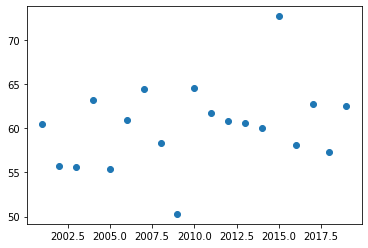

In [79]:
plt.scatter(jackson_count["measurement_year"],jackson_count["avg_heig"])

In [143]:
query3 = """
SELECT
    tree_phase_2_plot_number,
    total_height as avg_heig,
    measurement_year,
    measurement_month,
    plot_county_code
FROM
    `bigquery-public-data.usfs_fia.plot_tree`
WHERE
    plot_state_code = 39
    AND total_height > 0

;        """
response3 = usfs.query_to_pandas_safe(query3, max_gb_scanned=10)

In [144]:
response3.tree_phase_2_plot_number.value_counts()

224     203
388     176
220     173
778     170
3747    166
       ... 
2350      1
3222      1
3411      1
5097      1
2187      1
Name: tree_phase_2_plot_number, Length: 1875, dtype: int64

In [145]:
sameTree = response3[response3.tree_phase_2_plot_number == 224]

In [169]:
year = []
for MY in sameTree.measurement_year:
#     date.append(datetime.datetime(sameTree["measurement_year"], sameTree["measurement_month"], 1))
    year.append(MY)

month = []
for MY in sameTree.measurement_month:
    month.append(MY)

date = []
for i in range(len(month)):
    date.append(datetime.datetime(year[i],month[i],1))

In [222]:
means = sameTree.groupby("measurement_year", as_index=False).mean()
means_date=[datetime.datetime(2001,4,1),datetime.datetime(2008,2,1),datetime.datetime(2013,1,1),datetime.datetime(2019,3,1)]

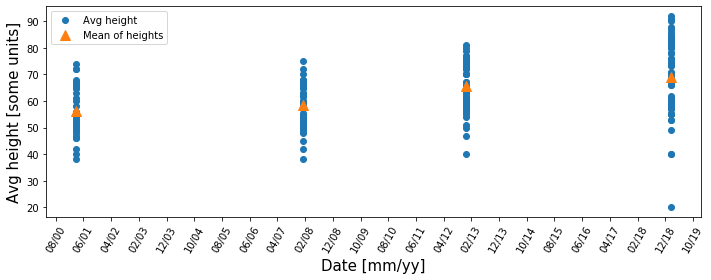

In [241]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
fig, ax = plt.subplots(figsize=(10,4))
rule = rrulewrapper(MONTHLY, interval=10)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%y')
plt.plot_date(date, sameTree["avg_heig"], label = "Avg height")
plt.plot_date(means_date, means["avg_heig"], marker="^", markersize=10, label="Mean of heights")

ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=60, labelsize=10)
plt.legend()
plt.xlabel("Date [mm/yy]", fontsize=15)
plt.ylabel("Avg height [some units]",fontsize=15)
plt.tight_layout()
plt.savefig("datevsTreeHeight.png", dpi=150)

In [193]:
means.measurement_month

measurement_year
2001    4.0
2008    2.0
2013    1.0
2019    3.0
Name: measurement_month, dtype: float64